In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# Récupérer les données des .csv associés à chaque film et chaque étiquette

In [12]:
# SW 1,2,4 en train
dfSW1_droid = pd.read_csv('trainReplicasSW1_droid.csv',sep='/',converters={"replica":str,"isDroid":int})
dfSW1_nonDroid = pd.read_csv('trainReplicasSW1_nonDroid.csv',sep='/',converters={"replica":str,"isDroid":int})
dfSW2_droid = pd.read_csv('trainReplicasSW2_droid.csv',sep='/',converters={"replica":str,"isDroid":int})
dfSW2_nonDroid = pd.read_csv('trainReplicasSW2_nonDroid.csv',sep='/',converters={"replica":str,"isDroid":int})
dfSW3_droid = pd.read_csv('trainReplicasSW3_droid.csv',sep='/',converters={"replica":str,"isDroid":int})
dfSW3_nonDroid = pd.read_csv('trainReplicasSW3_nonDroid.csv',sep='/',converters={"replica":str,"isDroid":int})
dfSW4_droid = pd.read_csv('trainReplicasSW4_droid.csv',sep='/',converters={"replica":str,"isDroid":int})
dfSW4_nonDroid = pd.read_csv('trainReplicasSW4_nonDroid.csv',sep='/',converters={"replica":str,"isDroid":int})

In [13]:
dfSW4_droid
#print(dfSW1_droid.head)

,replica,isDroid
0,Did you hear that? They shut down the main rea...,1
1,This is madness. We're doomed.,1
2,There'll be no escape for the princess this time.,1
3,"What's that? R2-D2, where are you?",1
4,At last. Where have you been? They're heading ...,1
5,We'll be sent to the Kessel spice mines or sma...,1
6,How did we get into this mess? I really don't ...,1
7,I've got to rest before I fall apart. My joint...,1
8,What a desolate place this is. Where do you th...,1
9,It's much too rocky. This way is much easier.,1


In [14]:
dfSW4_nonDroid
#print(dfSW1_nonDroid.head)

,replica,isDroid
0,I need a droid who understands the binary lang...,0
1,You can waste time with your friends when your...,0
2,"Hey, what are you trying to push on us?",0
3,What about that blue one? We'll take that one.,0
4,You got a lot of carbon scoring here. Looks li...,0
5,He's kind of a strange old hermit. I wonder wh...,0
6,I guess you're too small to run away on me if ...,0
7,"That wizard's just a crazy old man. Tomorrow, ...",0
8,That'll be the end of it. It belongs to us now.,0
9,I don't think he exists anymore. He died about...,0


# Fusionner les dataframes de manière à obtenir un ensemble d'entraînement et un ensemble de validation

In [15]:
trainArray = [dfSW1_droid,dfSW1_nonDroid,dfSW2_droid,dfSW2_nonDroid,dfSW3_droid,dfSW3_nonDroid,dfSW4_droid,dfSW4_nonDroid]
trainFrame = pd.concat(trainArray)
#trainFrame = trainFrame.astype({"isDroid": int})

trainFrame.head

<bound method NDFrame.head of                                               replica  isDroid
0        I'm TC-14 at your service. This way, please.        1
1   We are greatly honored by your visit, Ambassad...        1
2                                         Cease fire.        1
3   Master Anakin, you are my maker and I wish you...        1
4   However, I should prefer it if I were a little...        1
5                                            Sell me?        1
6   My troops are in position to begin searching t...        1
7                                           Yes, sir.        1
8                       Captain, take them to Camp 4.        1
9                                       Roger, roger.        1
10                I am C-3PO, human-cyborg relations.        1
11    I beg your pardon, but what do you mean, naked?        1
12             My parts are showing? My goodness! Oh!        1
13                             How might I serve you?        1
14  Oh, hello. I don't be

# Define and use sklearn Tfidf

In [19]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(trainFrame.replica).toarray()
labels = trainFrame.isDroid

#trainFrame['replica'].shape
print(len(np.where(features == 0)))
print(features)

2
[[0.39712658 0.39712658 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


# Model selection

as suggested on https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

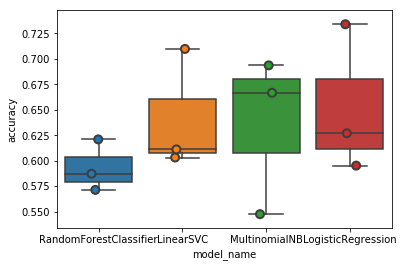

In [17]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(class_prior=[0.5,0.5]),
    LogisticRegression(random_state=0),
]

CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
      entries.append((model_name, fold_idx, accuracy))
        
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

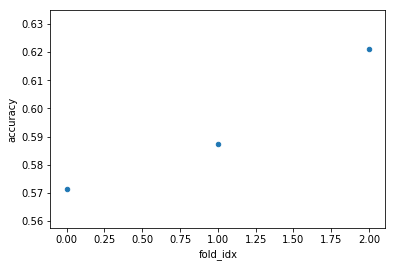

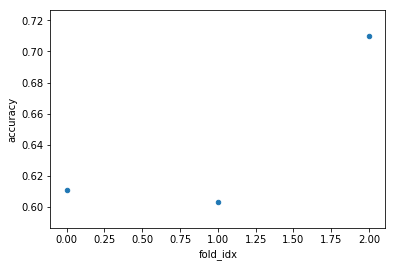

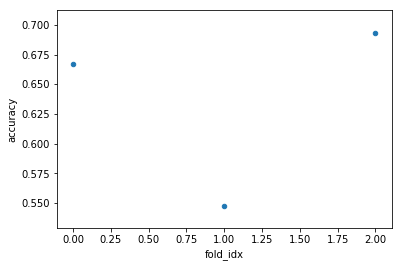

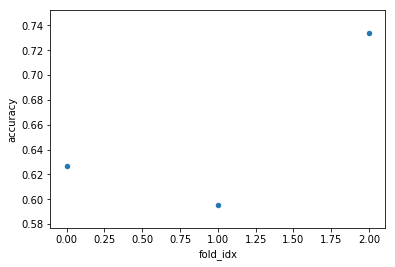

In [18]:
cv_df_RF = cv_df.loc[cv_df['model_name']=='RandomForestClassifier']
cv_df_RF.plot(x='fold_idx',y='accuracy',kind="scatter")

cv_df_LinearSVC = cv_df.loc[cv_df['model_name']=='LinearSVC']
cv_df_LinearSVC.plot(x='fold_idx',y='accuracy',kind="scatter")

cv_df_MultinomNB = cv_df.loc[cv_df['model_name']=='MultinomialNB']
cv_df_MultinomNB.plot(x='fold_idx',y='accuracy',kind="scatter")

cv_df_LogReg = cv_df.loc[cv_df['model_name']=='LogisticRegression']
cv_df_LogReg.plot(x='fold_idx',y='accuracy',kind="scatter")